# Working with PDB Structures

In this notebook we are going to see how to create **Structure** objects from different sources and which can of information can be extracted from them by using **PyFoldX**. 

Before starting we import what we need.

In [1]:
from pyfoldx.structure import Structure

In [2]:
#Some other imports, to work with the data and to plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We want to print full tables
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)

## The Structure Class

Structure objects can be created from the following sources:

- From internet, just specifying the PDB code.
- From a file, specifying a PDB code and the path parameter.
- From a string variable containing the lines in PDB format (all **pyFoldX** internal work pass PDBs as strings)
- From the **pyFoldX** repaired strucures' database.


In [3]:
# Let's load a small structure with its PDB code from internet to work with
st=Structure("2ci2")

### Energy calculations

#### Stability

To compute a whole structure $\Delta G$ we can call the function *getTotalEnergy*, it willreturn the results of the FoldX Stability command, with the total energy and all the energy terms used to calculate it, in a Pandas DataFrame. 

More information about the FoldX Stability command can be read [here](http://foldxsuite.crg.eu/command/Stability).

In [4]:
st.getTotalEnergy()

Computing total energy for structure...
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2ci2,41.1902,-34.9928,-7.37146,-65.8078,-6.54918,99.9708,-86.8397,12.4507,34.0648,87.4155,0,0,0,9.81421,32.604,-0.964844,0,0,0,0,0,0


#### Sequence Detail

If we want to know the individual energy of each residue we can compute it through the function *getResiduesEnergy*.

More information about the FoldX SequenceDetail command can be read [here](http://foldxsuite.crg.eu/command/SequenceDetail).

In [5]:
st.getResiduesEnergy()

Computing residue energy for structure...
Energy computed.


,,,omega,phi,psi,sec_struct,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
Code,Mol,Pos,,,,,,,,,,,,,,,,,,,,,,,,,,
ASN,I,19,-9999,-9999,-160.041,*,0.88411,0,0,-0.00945221,-0.0111627,0.0295625,-7.65139e-10,0.777652,0.0111627,0.0230769,0,0,0,0.0632716,0,0,0,0,0,0,0,0
LEU,I,20,178.548,157.172,130.238,*,3.70785,0,0,-0.193118,0,0.136048,-0.404664,0.777652,0.16357,3.17668,0,0,0,0.0516839,0,0,0,0,0,0,0,0
LYS,I,21,173.903,-105.642,115.997,*,1.95714,0,-0.620529,-0.902533,-0.70725,2.17997,-1.07418,0,1.88794,1.18871,0,0,0,0.00501148,0,0,0,0,0,0,0,0
THR,I,22,-174.93,-121.326,-5.55767,*,1.77891,0,0,-0.761137,0,1.40159,-0.833365,0.0110509,0.228474,1.73175,0,0,0,0.000542663,0.951743,0,0,0,0,0,0,0
GLU,I,23,179.756,-145.297,142.113,*,2.59437,0,0,-1.20554,-0.179863,2.50559,-1.38139,0.222138,0.676607,1.89988,0,0,0,0.0569595,0.65939,0,0,0,0,0,0,0
TRP,I,24,-175.385,-122.73,61.2054,*,-2.92655,-1.32257,-0.789117,-2.781,0,2.28,-3.83796,0.762261,0.82863,1.84068,0,0,0,0.0925228,9.53544e-07,0,0,0,0,0,0,0
PRO,I,25,178.063,-51.8643,-31.9276,3,-0.780505,-0.332198,0,-0.776829,0,0.393559,-1.20148,0.545886,0.25628,0.334277,0,0,0,0,0.043481,0,0,0,0,0,0,0
GLU,I,26,-177.881,-68.6301,-7.30489,3,2.34108,0,-0.298803,-0.939761,-0.295581,2.71791,-0.847785,0,1.17727,0.82317,0,0,0,0.00466647,0.36942,0,0,0,0,0,0,0
LEU,I,27,-175.887,-93.2581,-14.6876,3,-2.35522,-1.26799,0,-1.91397,0,1.45826,-3.30189,0.113451,0.96105,1.59588,0,0,0,0,1.36806,0,0,0,0,0,0,0


#### Repairing a Structure

The FoldX software have a command called [RepairPDB](http://foldxsuite.crg.eu/command/RepairPDB) that minimizes the energy by self mutating the sidechain of residues with high energy. This function can be called through the *repair* method of the Structure class.

In [6]:
# We create a new Structure object with the result of the repair() method
stRepaired = st.repair()

Repairing structure...
Structure repaired.


Let's compare the energies of both structures

In [7]:
print( "Original Structure energy" )
print( float(st.getTotalEnergy().total) )
print()
print( "Repaired Structure energy" )
print( float(stRepaired.getTotalEnergy().total) )

Original Structure energy
Computing total energy for structure...
Energy computed.
41.1902

Repaired Structure energy
Computing total energy for structure...
Energy computed.
0.615092


As we can see, the energy was minimized and almost 40 Kcal/mol where lost.

Let's plot now the individual energies of the residues for both structures to see which ones where optimized.

Computing residue energy for structure...
Energy computed.
Computing residue energy for structure...
Energy computed.


<AxesSubplot:xlabel='Code-Mol-Pos'>

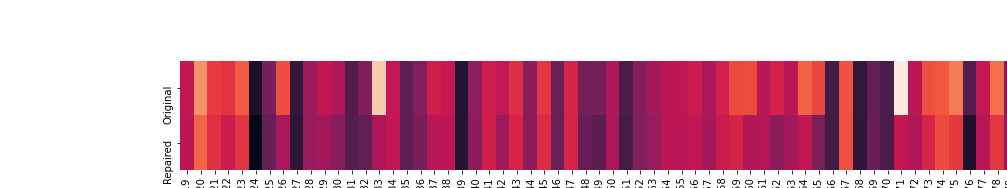

In [8]:
# Of all the terms, we keep just the total energy
seqEnergyOriginal = st.getResiduesEnergy()[["total"]]
seqRepaired = stRepaired.getResiduesEnergy()[["total"]]

# Naming the columns
seqEnergyOriginal.columns=["Original"]
seqRepaired.columns=["Repaired"]

# And plot horizontally
plt.figure(figsize=(20, 2))

# Append and turn horizontal both dataframes
combinedDf = seqEnergyOriginal.T.append(seqRepaired.T)

sns.heatmap(combinedDf.astype('float64'))

As we can observe, some residues like the Glutamine 33 or the Asparragine 71 which have high energy in the original structure were now optimized. 

Since repairing a structure can be a time consuming process and given that working with repaired structures can lead to better analyses, we made available the dataset of repaired structures for the whole PDB. The analysis can be read in the [pyFoldX paper]() and repaired structures can be instantiated in a very easy manner as is shown below.

In [9]:
#TODO

#### Mutating a structure

To generate mutant models using [FoldX BuildModel](http://foldxsuite.crg.eu/command/BuildModel) command we can call the *mutate* function.

This function takes as input:

- The mutations to be performed following the FoldX format: each mutation is separated by comma and is spelled as ORIGINAL_RESIDUE +CHAIN + POSITION + MUTATED_RESIDUE. For example, if we want to mutate the glycine in position 29 of chain I to alanine the mutation code is GI29A.
- Number of runs, an optional argument that allow to generate several mutants.
- *generateMutationsEnsemble*: if set to True, structure objects with the mutated and the wildtype structures will be returned apart of the Pandas DataFrame that contain the $\Delta \Delta G$ caused by the mutation(s) in the original structure.


In [10]:
# We are going to mutate two residues, five times, and save the structures.
energies, mutEnsemble, wtEnsemble = stRepaired.mutate("GI29A,AI35W;",number_of_runs=5)

Computing mutation(s) GI29A,AI35W; on target structure...
Energy computed.


Let's print the DataFrame with the $\Delta \Delta G$s for the five generated models.

In [11]:
energies.round(2)

,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
2ci2_Repaired_GI29A_AI35W_0,18.2246,-0.102597,-2.05524e-11,-2.77652,-0.0375403,2.19853,-4.15276,18.9589,0.909572,2.22851,0,0,0,0.998441,0.478672,-5.4956e-14,0,0,0,0,0,0
2ci2_Repaired_GI29A_AI35W_1,14.2779,0.764105,0.252581,-2.79622,-0.360763,1.73434,-4.38852,14.8137,0.654371,2.24222,0,0,0,1.31501,0.245687,0.0471514,0,0,0,0,0,0
2ci2_Repaired_GI29A_AI35W_2,15.4405,-0.0632934,0.807508,-2.3575,0.272163,0.999928,-3.68808,14.7333,0.130654,2.21081,0,0,0,2.39615,0.484189,-0.00117654,0,0,0,0,0,0
2ci2_Repaired_GI29A_AI35W_3,13.1048,-0.17494,0.759816,-2.29009,0.336872,0.962927,-3.6156,13.6004,0.269384,2.21673,0,0,0,1.04016,0.452602,-0.000922857,0,0,0,0,0,0
2ci2_Repaired_GI29A_AI35W_4,13.77,-0.521402,-0.351809,-3.1155,0.0853079,2.91979,-4.46417,14.9597,1.17111,2.24478,0,0,0,0.818994,0.815746,0.0231899,0,0,0,0,0,0


We were trying to put a big residue like triptophan in the place of a small one like is the alanine. We can observe that all the models posess a big contribution from the Van der Waals class energy term. 

We will select eventhough for further analyses the one with smaller energy variation. We can create a new **Structure** object from the results of the mutate command as below.

In [12]:
# We will select the frame 3, the want with smaller energy, and generate two objects, one for the mutated structure and another for the wildtype

stMut = Structure("2ci2_GI29A_AI35",   from_string=mutEnsemble.frames[3].toPdb())
stWT = Structure("2ci2_GI29A_AI35_WT", from_string=wtEnsemble.frames[3].toPdb())

Now let's plot the energies at sequence detail.

Computing residue energy for structure...
Energy computed.
Computing residue energy for structure...
Energy computed.


<AxesSubplot:xlabel='Code-Mol-Pos'>

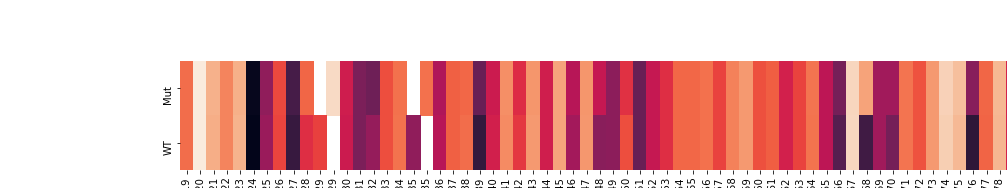

In [13]:
# Of all the terms, we keep just the total energy
seqEnergyMut = stMut.getResiduesEnergy()[["total"]]
seqEnergyWT = stWT.getResiduesEnergy()[["total"]]

# Naming the columns
seqEnergyMut.columns=["Mut"]
seqEnergyWT.columns=["WT"]

# Formatting the plotted df
plotDF = seqEnergyMut.T.append(seqEnergyWT.T) # We flip them horizontally
plotDF = plotDF.T.sort_values(['Pos']).T # We reorder them by pos
plotDF = plotDF.astype('float64') # We force to be numbers

# And plot horizontally
plt.figure(figsize=(20, 2))
sns.heatmap(plotDF)

As can be seen, not only the mutated residues have an energy variation but also some neighbour residues.

#### Network infomation

By calling the *getNetworks* method, different networks will be setted in the networks attribute of the structure.

In [14]:
st.getNetworks()
stRepaired.getNetworks()

Computing networks within structure...
Networks computed.
Computing networks within structure...
Networks computed.


These are the networks computed

In [15]:
st.networks.keys()

dict_keys(['Distances', 'Disulfide', 'Electro', 'Hbonds', 'Partcov', 'VdWClashes', 'Volumetric'])

Lets plot, i.e., the network of residues clashing within the structure.

<AxesSubplot:>

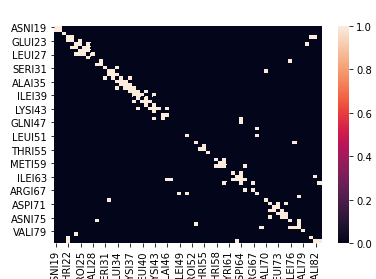

In [16]:
sns.heatmap(data=st.networks['VdWClashes'])

Now, if we substract the network of clashes of the original versus the repaired structure, we will have cero in the positions that remain unchanged, 1 for those that are clashing in the repaired and not in the original and -1 for those not clashing in the repaired and are clashing in the original. In order to minimize the energy, some clashes are solved and others are won. This is a boolean network but the energetic contribution of each clash is different. This can be investigated in depth with the residues energy dataframes.

<AxesSubplot:>

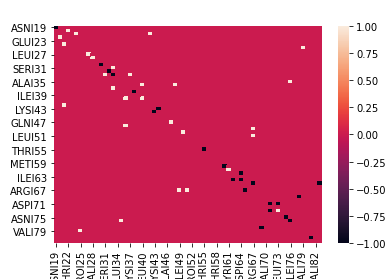

In [17]:
sns.heatmap(data=stRepaired.networks['VdWClashes']-st.networks['VdWClashes'])

In [18]:
st.networks.keys()

dict_keys(['Distances', 'Disulfide', 'Electro', 'Hbonds', 'Partcov', 'VdWClashes', 'Volumetric'])